In [29]:
import numpy as np
import matplotlib.pyplot as plt

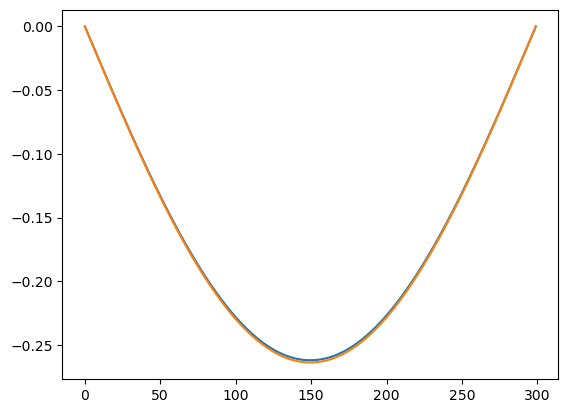

In [131]:
# Lets make a constants dictionary to not confuse them with variables
const = {
    "E": 2*10**8,
    "I": 3*10**(-4),
    "omega": 1.5*10**4,
    "L": 3
}

# Choose the number of mesh points
N = 300
h = const["L"]/N # step size is determined

# initiate the RHS x
x = np.linspace(0,const["L"],N)
# initiate A with the stencil
dc = -2*np.ones(N)
do = -0.5*dc[:-1]
A = np.diag(dc)+np.diag(do,k=1)+np.diag(do,k=-1)

# Make A and consider BCs
A = A*const["E"]*const["I"]/(h**2)
A[0,:]=np.zeros((1,N))
A[-1,:]=A[0,:]
A[0,0]=1
A[-1,-1]=1

# Make the RHS x
# x = const["omega"]*x*(const["L"]/2-x) # Careful Radu, typo included
x = const["omega"]*x*(const["L"]-x)/2
x[0]=0 # BCs
x[-1]=0

# Solve for y
y = np.linalg.solve(A,x)

pts = np.linspace(0,const["L"],N)
# act = const["omega"]*pts*pts*pts*(const["L"] - pts)/(12*const["E"]*const["I"]) #typo
act = const["omega"]*pts*(2*const["L"]*pts**2 - pts**3 - const["L"]**3)/(24*const["E"]*const["I"]) #typo
plt.plot(y)
plt.plot(act)

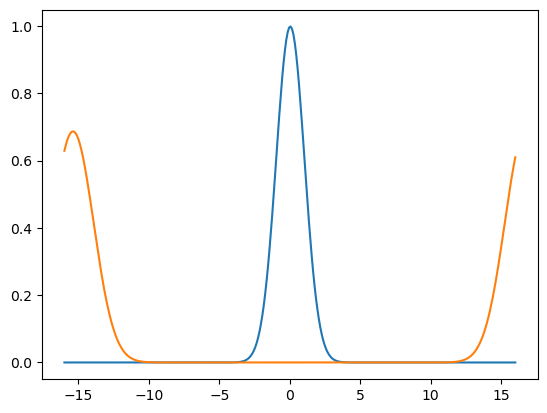

In [130]:

c = 1 # Speed
centr = 0
L = 16 # Spatial bounds of domain
T = 20 # Simulation length
N = 320 # Number of mesh pts
h = 2*L/N # Spatial step size
M = 600 # Number of time points
d = T/M # Time step 

U = np.zeros((N,M))
BC = np.zeros((N,N))

if centr == 1:
    diagelts = np.ones(N)
    udiagelts = -(0.5*d*c/h)*np.ones(N-1)
    ldiagelts = (0.5*d*c/h)*np.ones(N-1)
    BC[-1,0] = -d*c/h
    BC[0,-1] = d*c/h
elif c<0:
    diagelts = (1+d*c/h)*np.ones(N)
    udiagelts = -(d*c/h)*np.ones(N-1)
    ldiagelts = np.zeros(N-1)
    BC[-1,0] = -d*c/h
else:
    diagelts = (1-d*c/h)*np.ones(N)
    ldiagelts = (d*c/h)*np.ones(N-1)
    udiagelts = np.zeros(N-1)
    BC[0,-1] = d*c/h

A = np.diag(diagelts,k=0) + np.diag(udiagelts,k=1) + np.diag(ldiagelts,k=-1) + BC
# print(A,np.linalg.cond(A))
pts = np.linspace(-L,L,N)
U0 = np.exp(-pts**2/2)
U[:,0] = U0

for times in range(1,M):
    U[:,times] = A@U[:,times-1]

plt.plot(pts,U[:,1])
plt.plot(pts,U[:,500])